**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

Load Data

In [2]:
test_dataset1 = pd.read_csv("C:/Users/ASU/Desktop/IITD/DATAScience/PythonProjectDataset/test___dataset2.csv")
traindatase1=pd.read_csv("C:/Users/ASU/Desktop/IITD/DATAScience/PythonProjectDataset/train__dataset2.csv")


***Remove some coloums which were normalized***

In [3]:

remove = ['lead_time','lead_time_normalized','arrival_year','arrival_date',
                                            'avg_price_per_room']
traindataset= traindatase1[traindatase1.columns.difference(remove)]
test_dataset=test_dataset1[test_dataset1.columns.difference(remove)]

In [4]:
#here we will get 10 starting data set from taindataset 
traindataset.head(10)


,Arrival_Year_Categorical,Arrival_date_categorical,Average_Price_Normalized,Lead_Time_Category,arrival_month,booking_status,market_segment_type,no_of_adults,no_of_children,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,repeated_guest,required_car_parking_space,room_type_reserved,type_of_meal_plan
0,0,3,1.070750,1,12,0,1,2,0,0,0,2,4,1,0,0,0,0
1,1,2,1.401252,0,4,1,1,2,1,0,0,0,2,0,0,0,0,0
2,1,1,0.934200,4,10,1,0,1,0,0,0,0,5,1,0,0,0,0
3,1,2,1.159657,1,6,1,0,1,0,0,0,0,4,2,0,0,0,0
4,1,3,0.671635,0,1,0,1,2,0,0,0,1,4,0,0,0,0,1
5,1,2,1.443773,1,9,0,1,2,0,0,0,1,3,2,0,0,1,0
6,1,1,0.831088,0,2,0,2,1,0,0,0,0,2,0,0,0,4,0
7,1,3,1.166422,1,11,0,1,2,0,0,0,1,3,1,0,0,0,2
8,1,3,1.302488,0,9,0,1,2,0,0,0,1,2,2,0,0,1,0
9,0,2,1.053355,0,8,0,0,2,0,0,0,0,2,0,0,0,0,2


In [5]:
#here we will get 10 starting data set from testdataset 
test_dataset.head(10)

,Arrival_Year_Categorical,Arrival_date_categorical,Average_Price_Normalized,Lead_Time_Category,arrival_month,market_segment_type,no_of_adults,no_of_children,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,repeated_guest,required_car_parking_space,room_type_reserved,type_of_meal_plan
0,1,3,0.931621,1.0,3,1,2,0,0,0,0,2,1,0,1,0,0
1,1,1,0.503056,4.0,12,0,2,0,0,0,0,2,0,0,0,0,0
2,1,3,0.725562,1.0,2,0,1,0,0,0,0,3,2,0,0,0,0
3,1,3,1.112528,5.0,10,1,2,0,0,0,1,0,2,0,0,0,2
4,1,3,1.192823,1.0,8,1,2,0,0,0,0,4,1,0,0,1,0
5,1,1,1.149289,1.0,10,1,2,0,0,0,1,1,0,0,0,0,0
6,0,3,1.509168,0.0,8,1,2,2,0,0,0,1,0,0,0,3,0
7,1,2,1.005628,1.0,3,1,2,0,0,0,1,2,0,0,0,1,0
8,1,3,1.027395,3.0,9,1,2,0,0,0,0,2,1,0,0,0,0
9,0,1,1.096372,0.0,10,1,2,0,0,0,1,3,0,0,0,0,0


In [6]:
#we dont want null value in dataset 
traindataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Arrival_Year_Categorical              18137 non-null  int64  
 1   Arrival_date_categorical              18137 non-null  int64  
 2   Average_Price_Normalized              18137 non-null  float64
 3   Lead_Time_Category                    18137 non-null  int64  
 4   arrival_month                         18137 non-null  int64  
 5   booking_status                        18137 non-null  int64  
 6   market_segment_type                   18137 non-null  int64  
 7   no_of_adults                          18137 non-null  int64  
 8   no_of_children                        18137 non-null  int64  
 9   no_of_previous_bookings_not_canceled  18137 non-null  int64  
 10  no_of_previous_cancellations          18137 non-null  int64  
 11  no_of_special_r

In [7]:
traindataset.describe()

,Arrival_Year_Categorical,Arrival_date_categorical,Average_Price_Normalized,Lead_Time_Category,arrival_month,booking_status,market_segment_type,no_of_adults,no_of_children,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,repeated_guest,required_car_parking_space,room_type_reserved,type_of_meal_plan
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,0.820698,1.919391,1.000000,0.958593,7.432762,0.327618,0.806197,1.846777,0.107515,0.151403,0.022440,0.617522,2.208965,0.811104,0.025087,0.031648,0.336770,0.318465
std,0.383616,0.895455,0.342815,1.081532,3.076999,0.469357,0.645972,0.516020,0.408901,1.714135,0.370078,0.787941,1.426365,0.873470,0.156393,0.175066,0.772865,0.629140
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.776004,0.000000,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.961066,1.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.162266,1.000000,10.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,5.218457,5.000000,12.000000,1.000000,4.000000,4.000000,9.000000,58.000000,13.000000,5.000000,17.000000,7.000000,1.000000,1.000000,6.000000,3.000000


In [8]:
#So very thing is not null
#Data count
traindataset.nunique().count()

18

In [9]:
print("Test DATA",test_dataset.shape)
print("TAIN DATA",traindataset.shape)

Test DATA (18138, 17)
TAIN DATA (18137, 18)


In [10]:
#we have to predict
l=traindataset.columns.values
k=test_dataset.columns.values
for i in l:
    if i not in k:
        print("Target Variable is ",i.upper())

Target Variable is  BOOKING_STATUS


In [11]:
#Data Types
traindataset.dtypes

Arrival_Year_Categorical                  int64
Arrival_date_categorical                  int64
Average_Price_Normalized                float64
Lead_Time_Category                        int64
arrival_month                             int64
booking_status                            int64
market_segment_type                       int64
no_of_adults                              int64
no_of_children                            int64
no_of_previous_bookings_not_canceled      int64
no_of_previous_cancellations              int64
no_of_special_requests                    int64
no_of_week_nights                         int64
no_of_weekend_nights                      int64
repeated_guest                            int64
required_car_parking_space                int64
room_type_reserved                        int64
type_of_meal_plan                         int64
dtype: object

In [12]:
#Investigate all the elements with each data feature
#unique vqlues can be string numeric or so on

for coloums in traindataset:
    try:
        unique_values=np.unique(traindataset[coloums])
    except:
        unique_values=traindataset[coloums].unique()
    nr_values=len(unique_values)
    if nr_values<10:
        print('The number of values for features  {}  : {} ----  {}'.format(coloums.upper(),nr_values,unique_values))
    else:
        print('The number of values for features {}  : {} '.format(coloums.upper(),nr_values))

The number of values for features  ARRIVAL_YEAR_CATEGORICAL  : 2 ----  [0 1]
The number of values for features  ARRIVAL_DATE_CATEGORICAL  : 4 ----  [0 1 2 3]
The number of values for features AVERAGE_PRICE_NORMALIZED  : 2722 
The number of values for features  LEAD_TIME_CATEGORY  : 6 ----  [0 1 2 3 4 5]
The number of values for features ARRIVAL_MONTH  : 12 
The number of values for features  BOOKING_STATUS  : 2 ----  [0 1]
The number of values for features  MARKET_SEGMENT_TYPE  : 5 ----  [0 1 2 3 4]
The number of values for features  NO_OF_ADULTS  : 5 ----  [0 1 2 3 4]
The number of values for features  NO_OF_CHILDREN  : 5 ----  [0 1 2 3 9]
The number of values for features NO_OF_PREVIOUS_BOOKINGS_NOT_CANCELED  : 47 
The number of values for features  NO_OF_PREVIOUS_CANCELLATIONS  : 9 ----  [ 0  1  2  3  4  5  6 11 13]
The number of values for features  NO_OF_SPECIAL_REQUESTS  : 6 ----  [0 1 2 3 4 5]
The number of values for features NO_OF_WEEK_NIGHTS  : 18 
The number of values for fe

'''Missing Data
As models cannot take in null values, it is important to check for missing data and handle missing data before modeling.
'''

In [13]:
# Checking for missing data
traindataset.isnull().sum()

Arrival_Year_Categorical                0
Arrival_date_categorical                0
Average_Price_Normalized                0
Lead_Time_Category                      0
arrival_month                           0
booking_status                          0
market_segment_type                     0
no_of_adults                            0
no_of_children                          0
no_of_previous_bookings_not_canceled    0
no_of_previous_cancellations            0
no_of_special_requests                  0
no_of_week_nights                       0
no_of_weekend_nights                    0
repeated_guest                          0
required_car_parking_space              0
room_type_reserved                      0
type_of_meal_plan                       0
dtype: int64


#Cleaning DATA
""" WE have already clean data 

 
 
 
Duplicate values

"" we do not expect any duplicates. However, it is good practice to ensure our dataset does not contain duplicates."""

In [14]:
traindataset.duplicated().value_counts()

False    13338
True      4799
dtype: int64

In [15]:
traindataset[traindataset.duplicated(keep='first')]

,Arrival_Year_Categorical,Arrival_date_categorical,Average_Price_Normalized,Lead_Time_Category,arrival_month,booking_status,market_segment_type,no_of_adults,no_of_children,no_of_previous_bookings_not_canceled,no_of_previous_cancellations,no_of_special_requests,no_of_week_nights,no_of_weekend_nights,repeated_guest,required_car_parking_space,room_type_reserved,type_of_meal_plan
182,1,0,0.966381,1,5,1,2,1,0,0,0,0,3,0,0,0,0,0
256,1,1,0.966381,1,6,0,0,2,0,0,0,0,2,0,0,0,0,0
325,0,3,0.628148,1,9,0,0,2,0,0,0,0,2,0,0,0,0,0
368,0,1,0.740924,3,9,0,0,1,0,0,0,0,2,1,0,0,0,0
431,1,3,0.579829,0,2,1,0,1,0,0,0,0,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18125,1,1,0.904533,1,12,0,1,2,0,0,0,2,1,1,0,0,0,0
18127,1,2,0.763441,0,2,0,1,2,0,0,0,0,1,0,0,0,0,1
18129,1,1,0.773105,4,10,1,0,2,0,0,0,0,2,1,0,0,0,0
18132,1,2,1.111338,1,4,1,0,1,0,0,0,0,2,0,0,0,0,0


Our dataset contains duplicates. However, it is possible that multiple bookings with the same features were made on the same 
    say. Since we do not have a feature such as booking ID, we cannot say for sure that those are true duplicates which makes 
    deleting those duplicates questionable.
    

# Correlation using pearson method'

The Pearson correlation coefficient is a measure of the linear relationship between two variables. 
It ranges from -1 to 1, where -1 indicates a perfectly negative linear relationship, 0 indicates no linear relationship,
and 1 indicates a perfectly positive linear relationship


In [16]:
# correlation using pearson method
traindataset.corr(method='pearson')['booking_status'].sort_values(ascending=False)

booking_status                          1.000000
Lead_Time_Category                      0.413417
Arrival_Year_Categorical                0.183256
Average_Price_Normalized                0.145245
no_of_week_nights                       0.096472
no_of_adults                            0.094354
type_of_meal_plan                       0.076685
no_of_weekend_nights                    0.061117
no_of_children                          0.035093
room_type_reserved                      0.021723
Arrival_date_categorical                0.001571
arrival_month                          -0.011472
no_of_previous_cancellations           -0.031852
market_segment_type                    -0.045906
no_of_previous_bookings_not_canceled   -0.060697
required_car_parking_space             -0.092640
repeated_guest                         -0.106715
no_of_special_requests                 -0.248289
Name: booking_status, dtype: float64

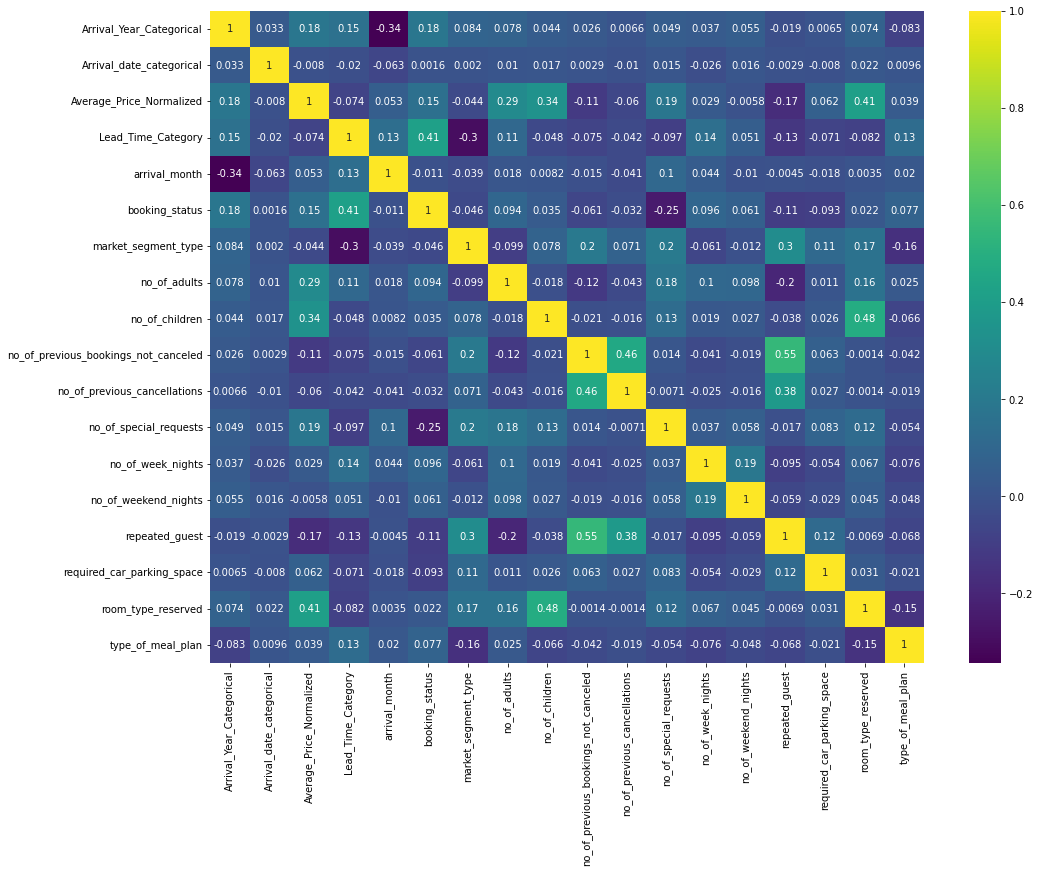

In [17]:
#Corelation of variables
plt.figure(figsize=(16,12))
sns.heatmap(traindataset.corr(method='pearson'), annot=True, cmap='viridis')
plt.show()

***Exploratory Data Analysis(EDA)***

Data Visualization

For supervised learning tasks, identify & visualize the target attribute(s)

In [18]:
#getting the categorical variables

categoricalV = traindataset.columns.drop(['booking_status','Average_Price_Normalized','no_of_previous_bookings_not_canceled',
                                            'no_of_previous_cancellations',
                                            'Lead_Time_Category',
                                            'Arrival_date_categorical'])



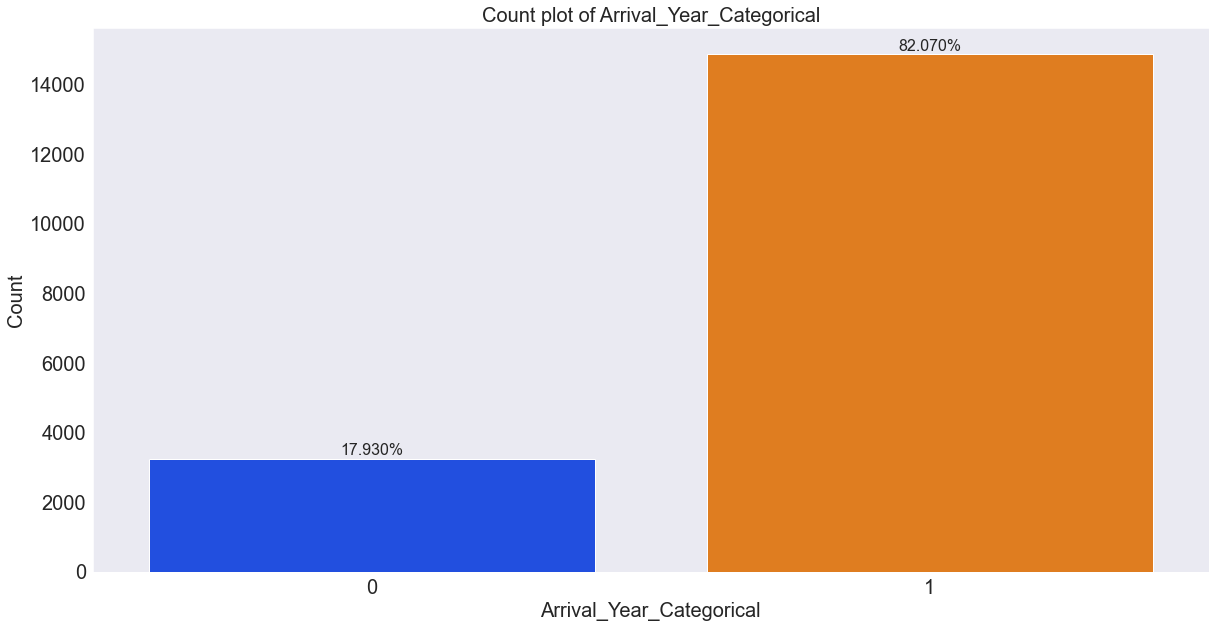

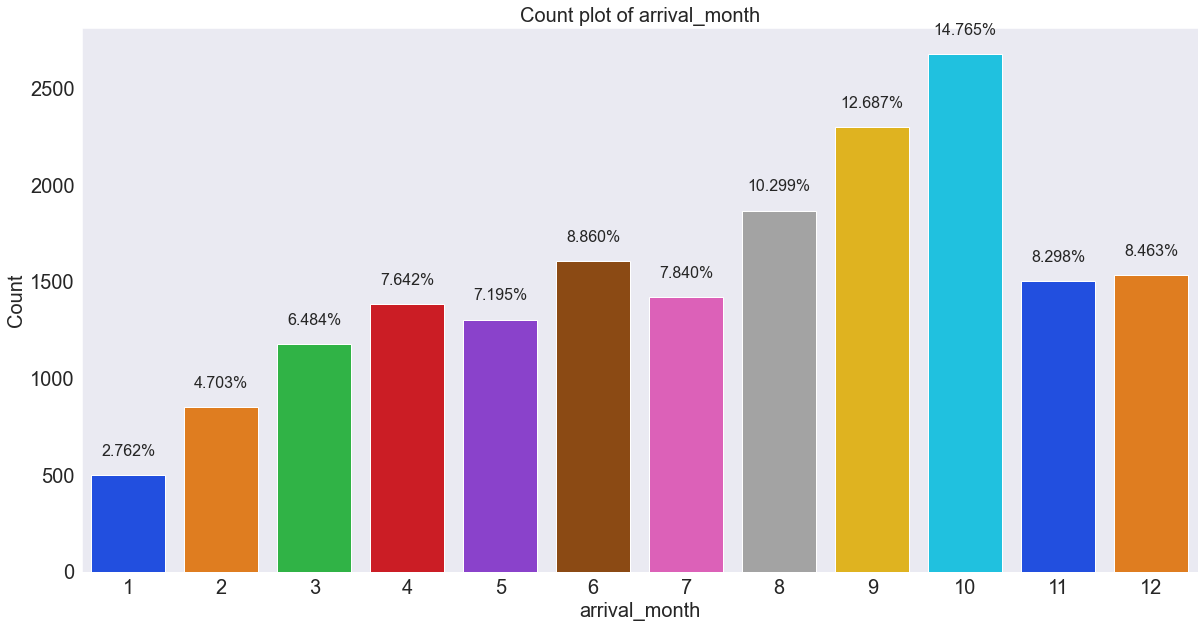

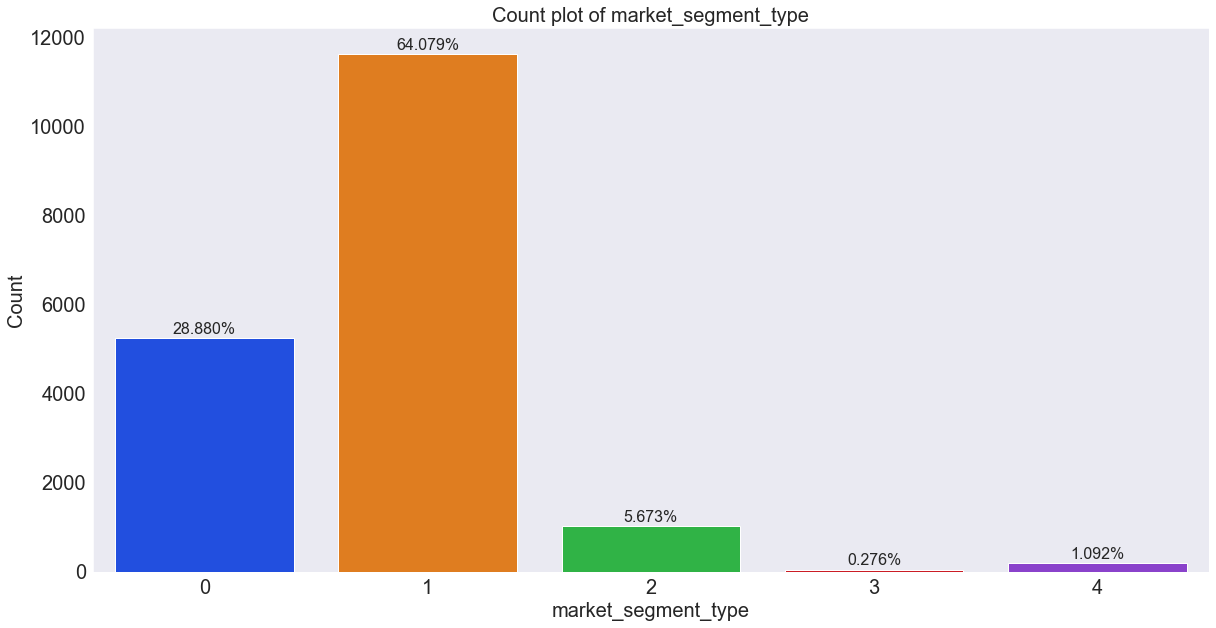

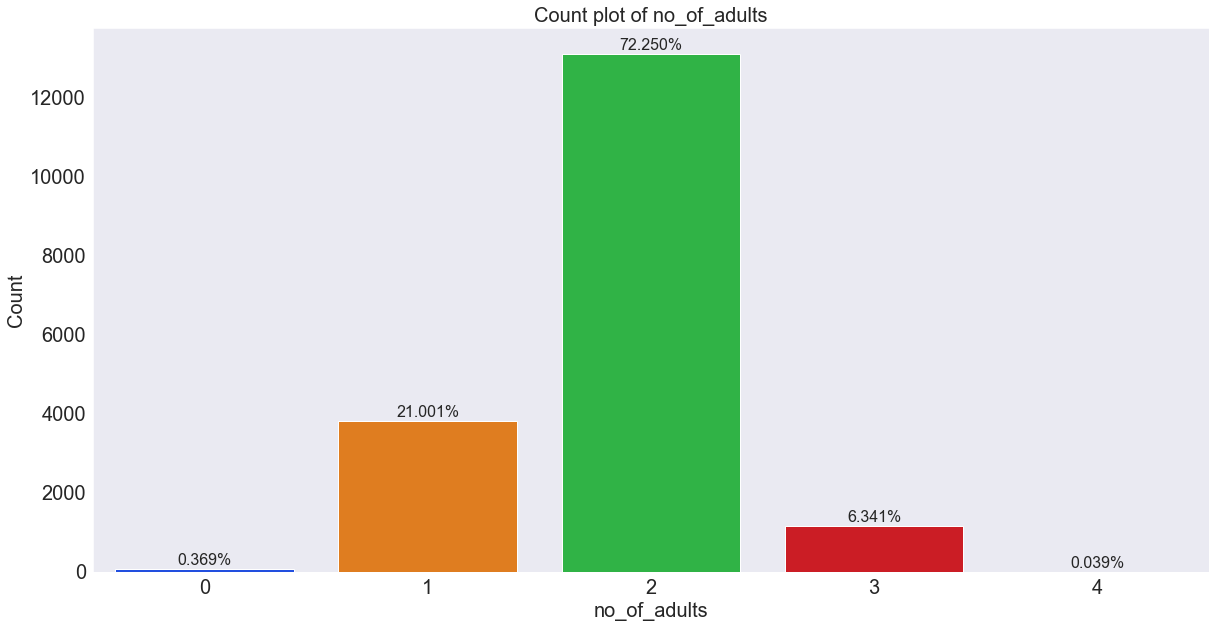

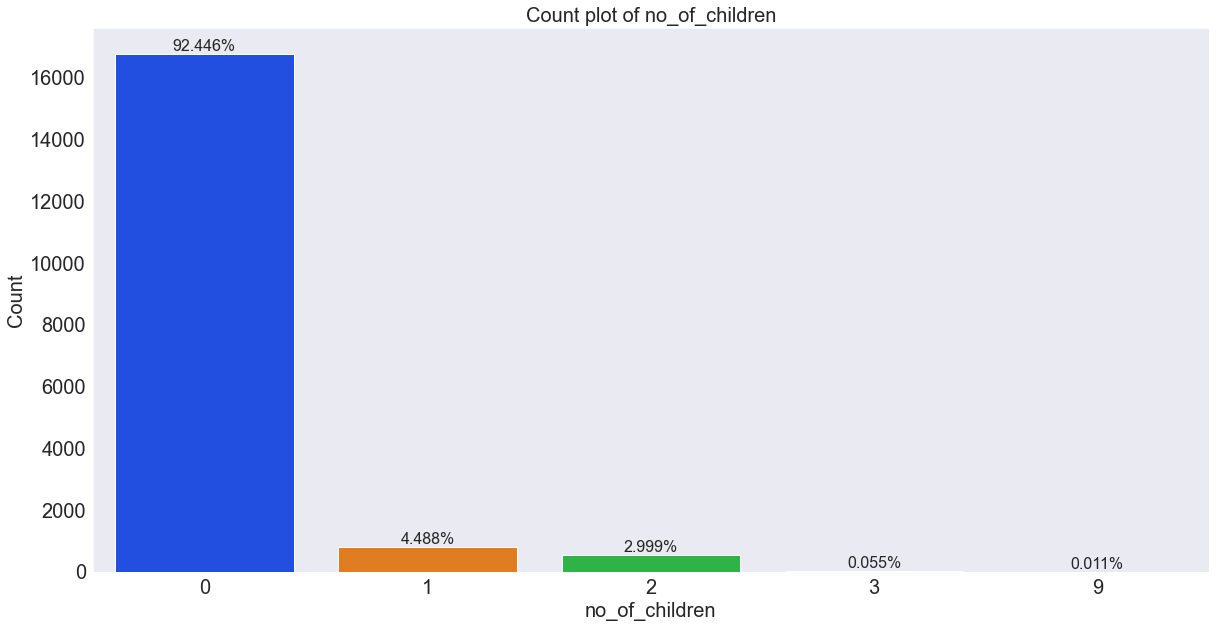

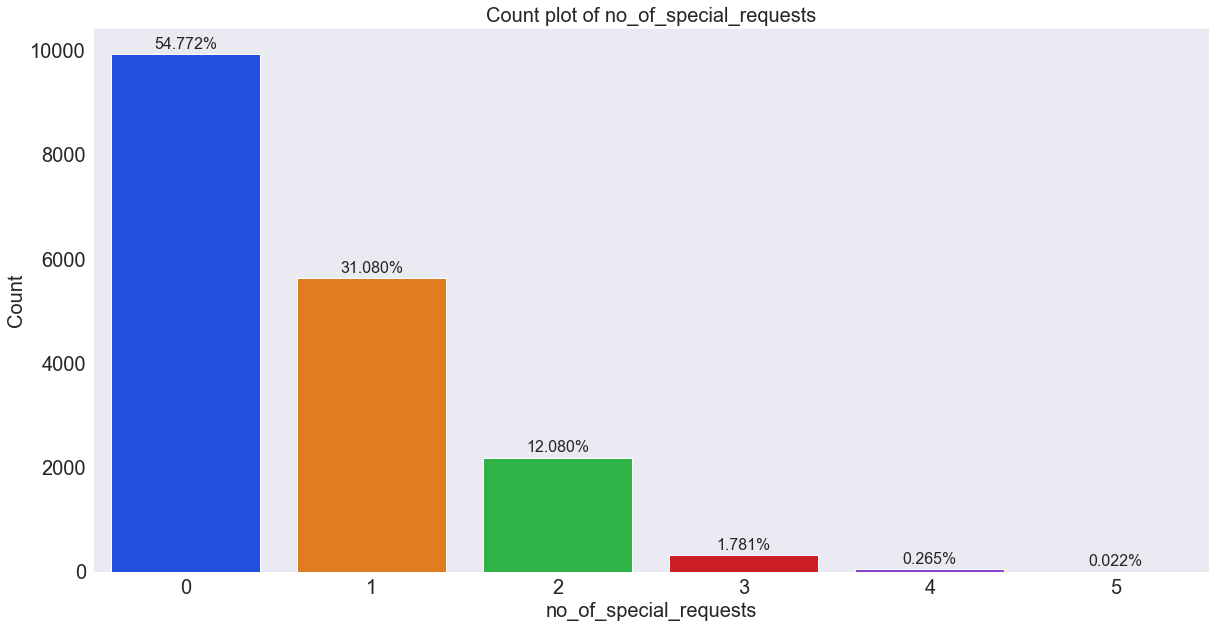

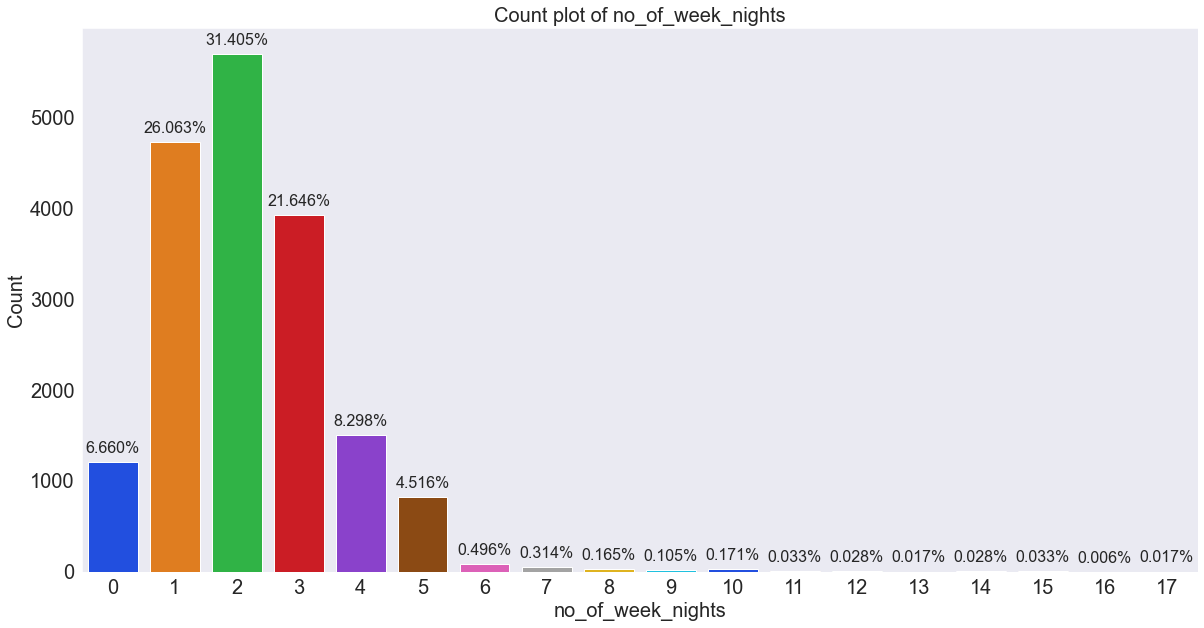

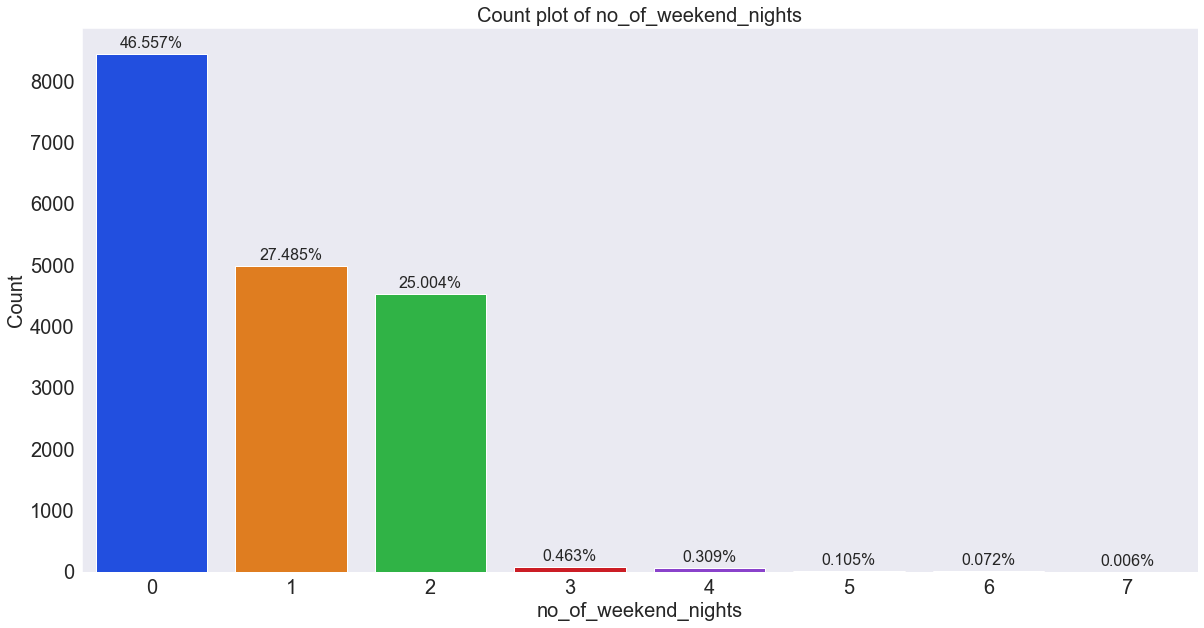

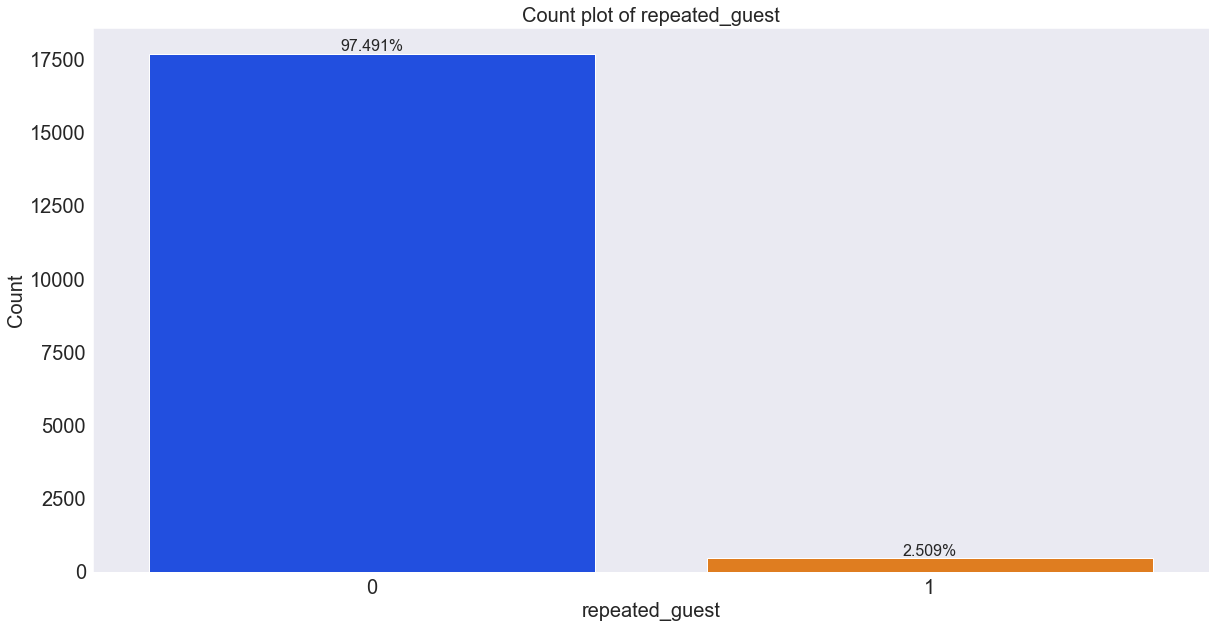

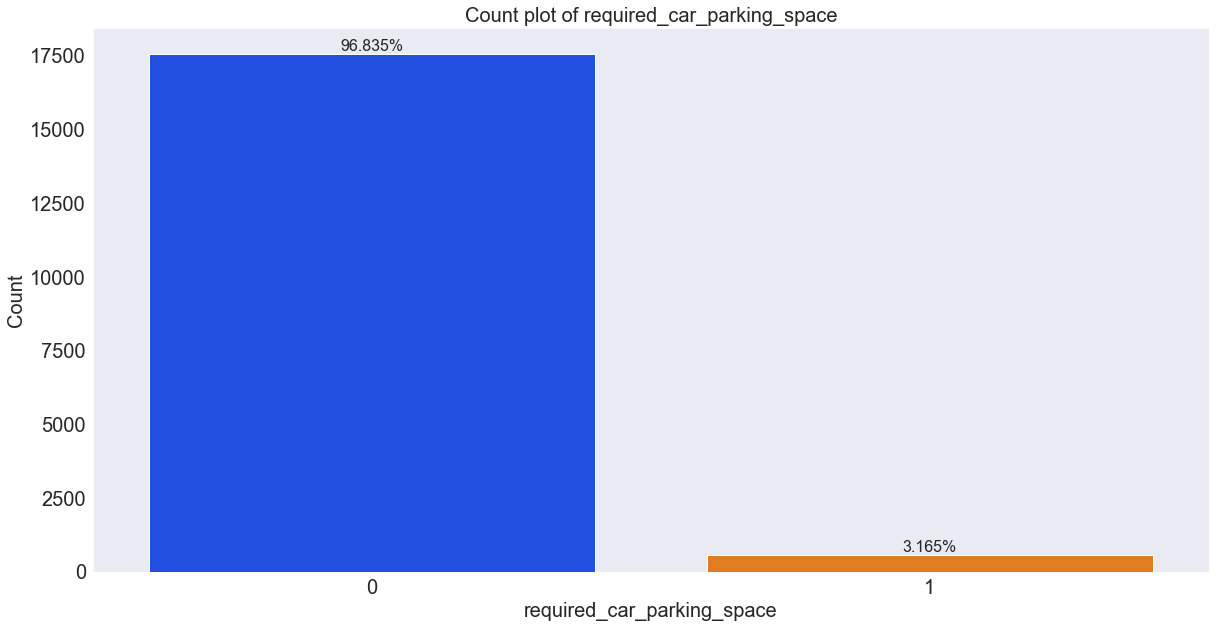

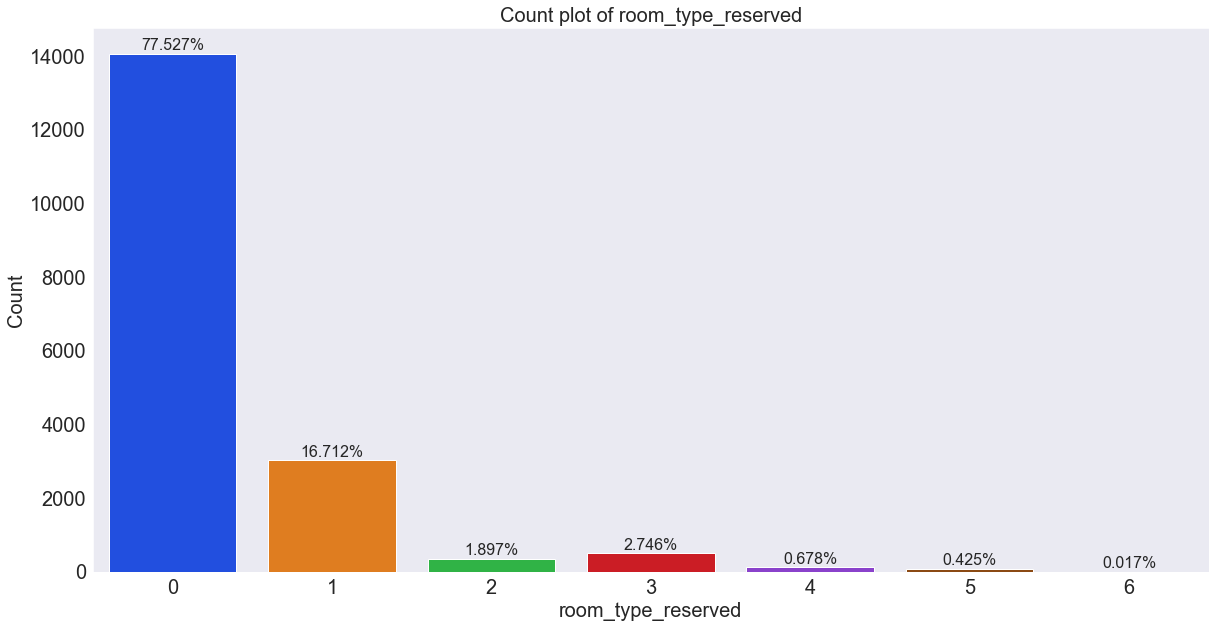

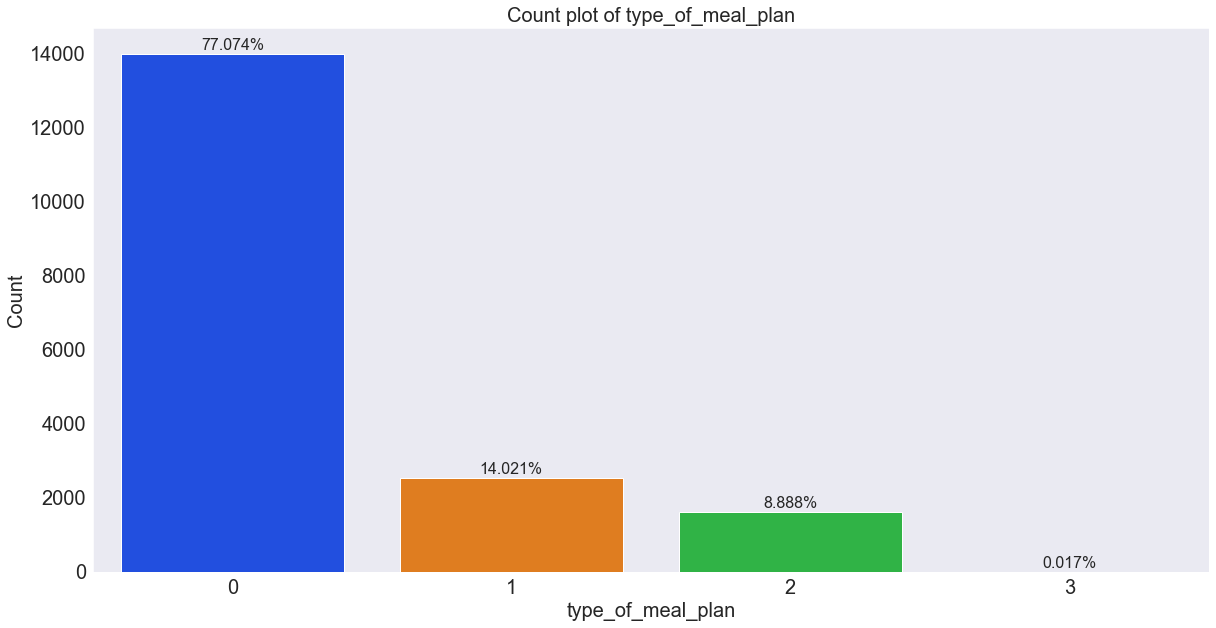

In [19]:

#plotting count plot for the categorical variables to show thier variation
for i in categoricalV:
    
    plt.figure(figsize=(20,10))
    sns.set_style("dark")
    plot = sns.countplot(data =traindataset, x=i,palette='bright')
    
    #adding the percentage of each bar above it 18137
    for bar in plot.patches:
      
        percentage = '{:.3f}%'.format(100 * bar.get_height()/len(traindataset))
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height()+100
        plot.annotate(percentage, (x, y),ha='center',size=16)
    
    plt.xticks(size=20)
    plt.xlabel(i,size=20)
    plt.yticks(size=20)
    plt.ylabel('Count',size=20)
    plt.title('Count plot of ' + i,size=20)
    plt.show()

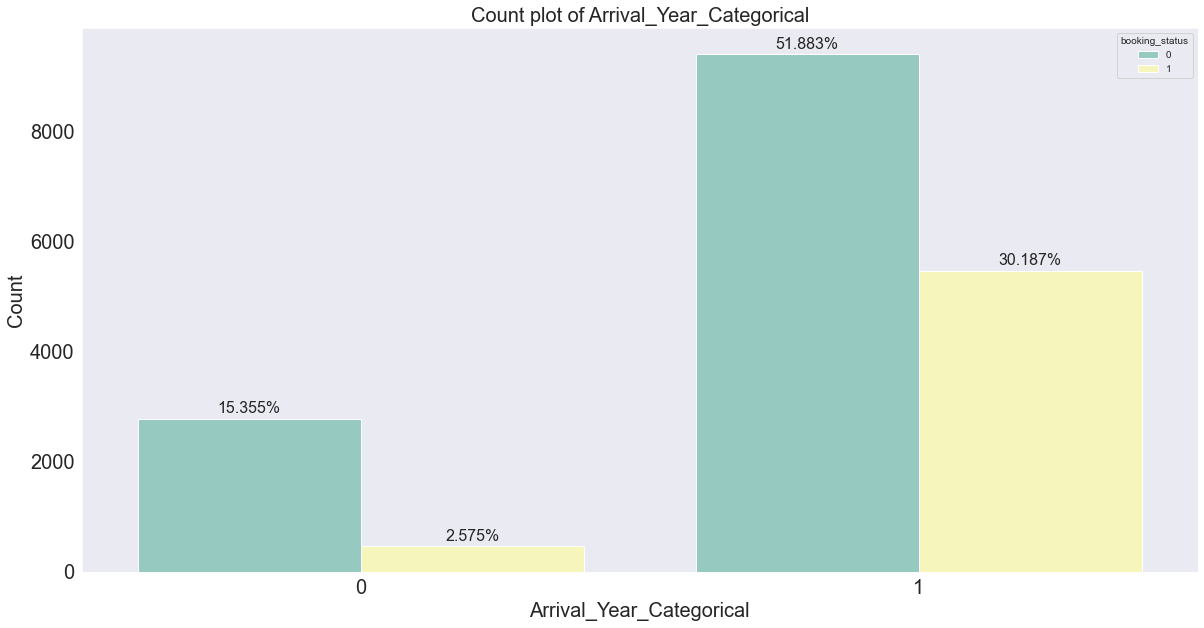

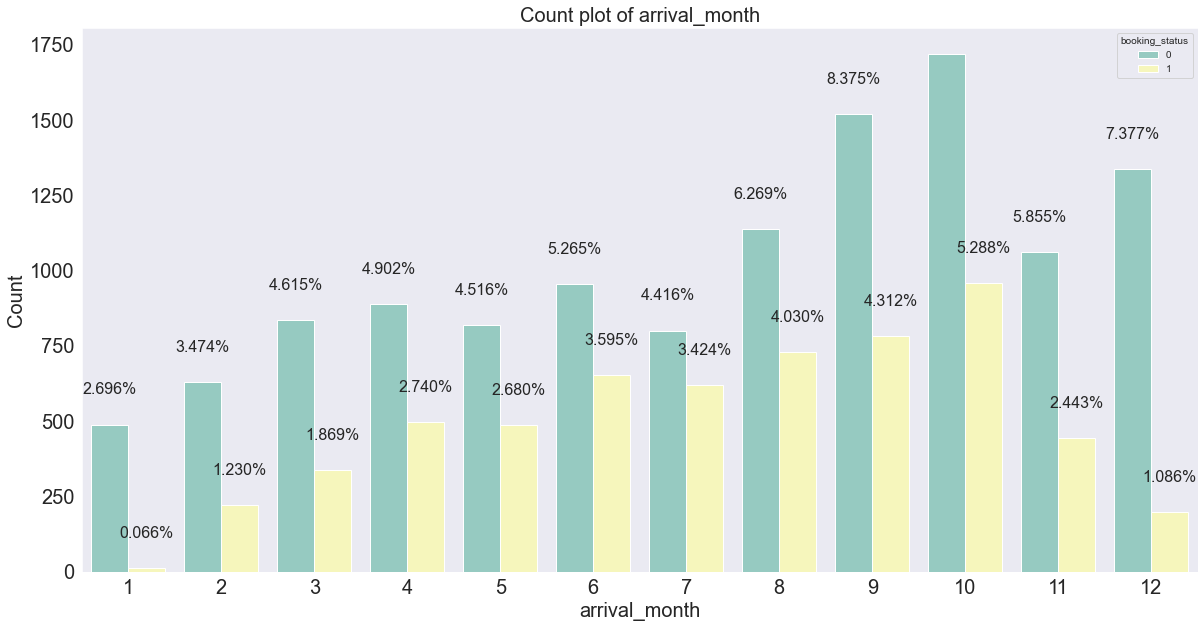

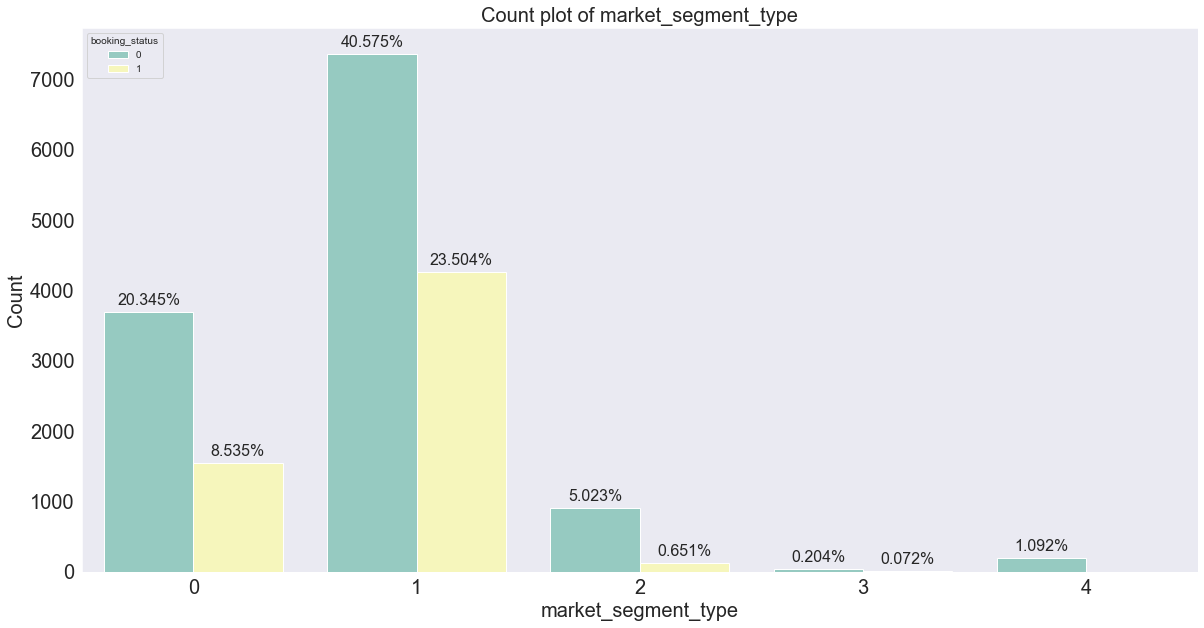

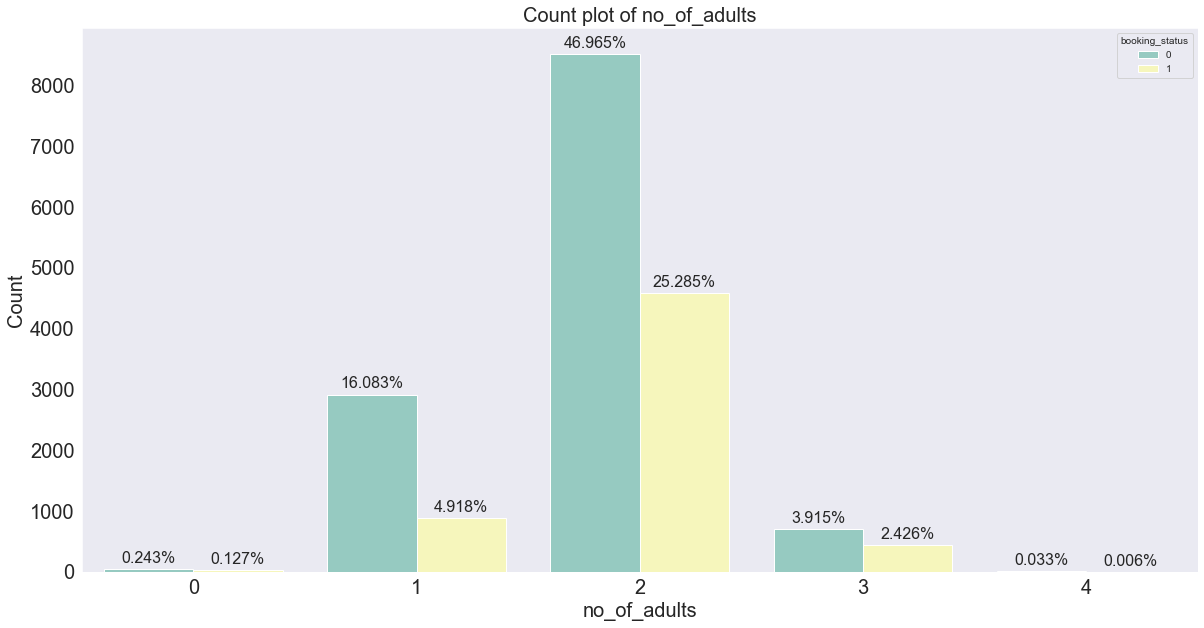

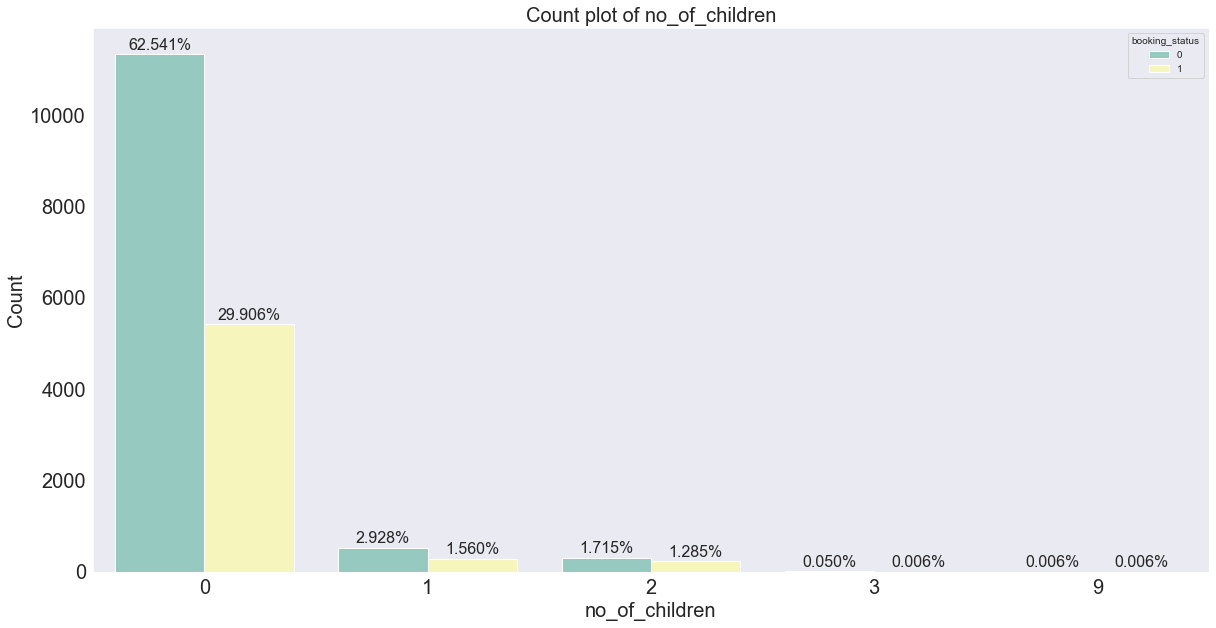

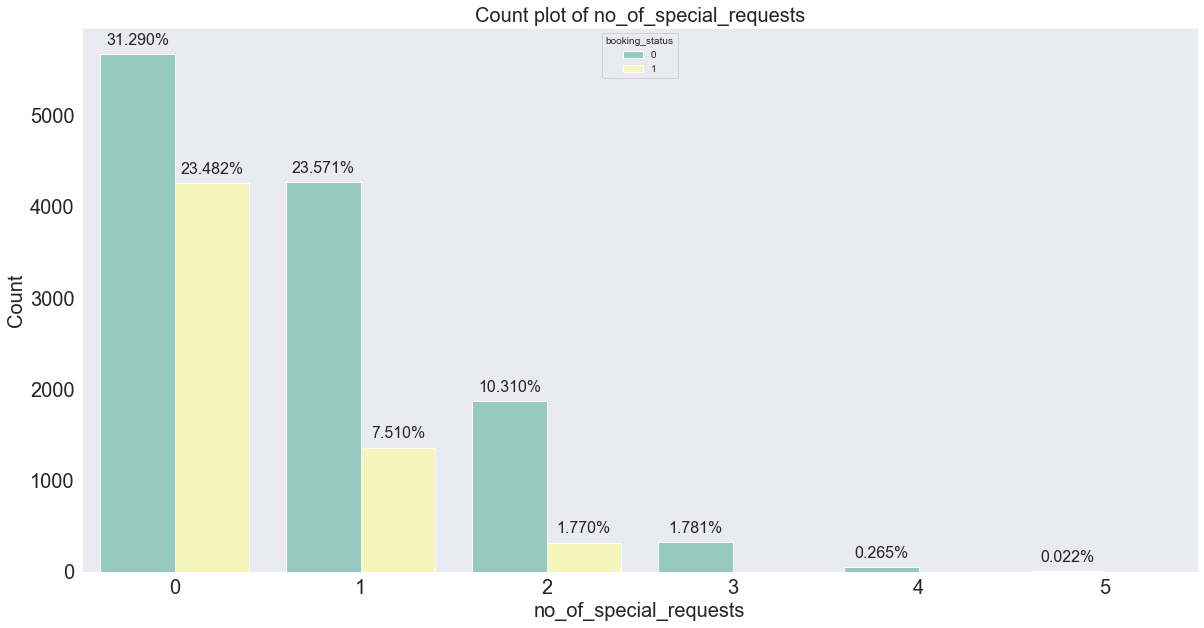

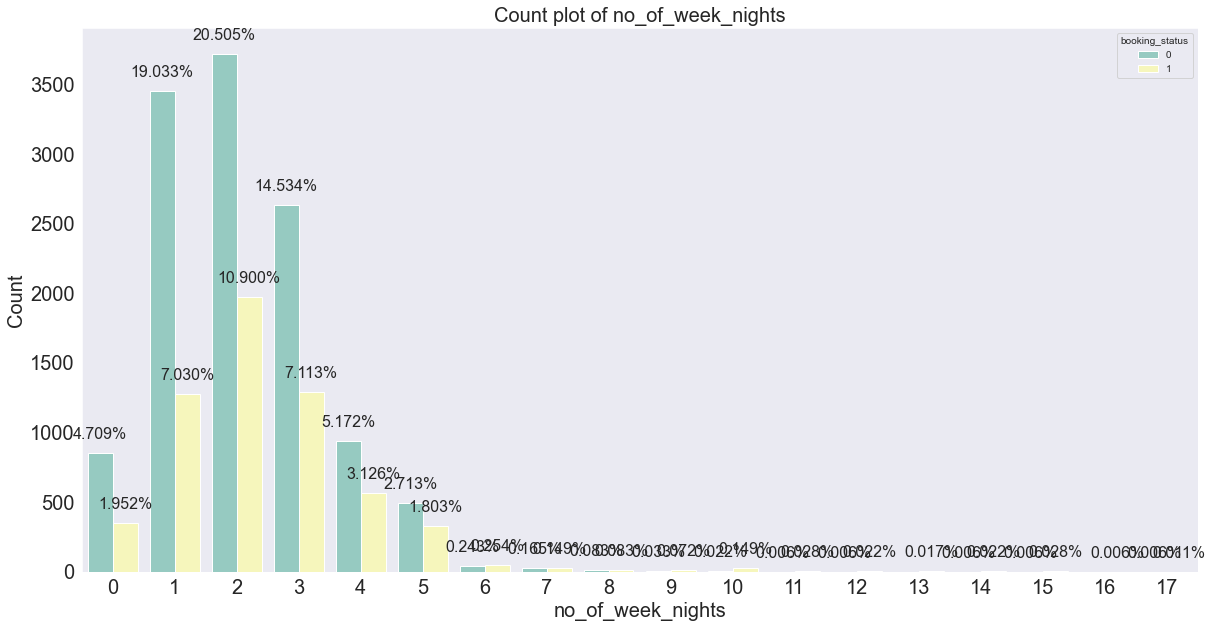

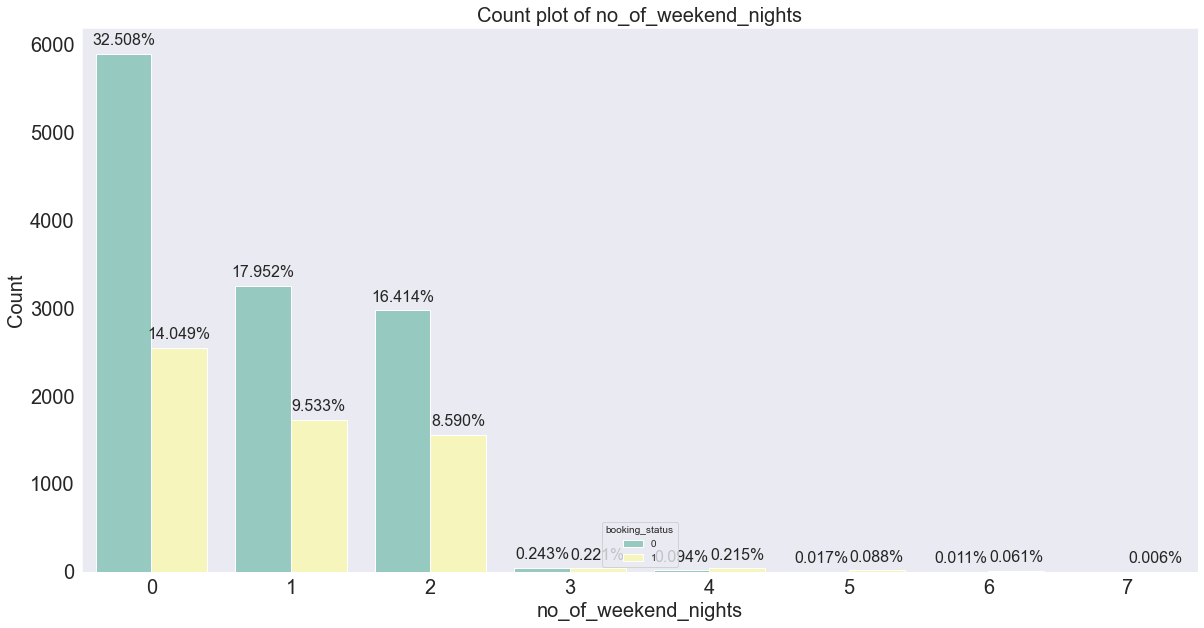

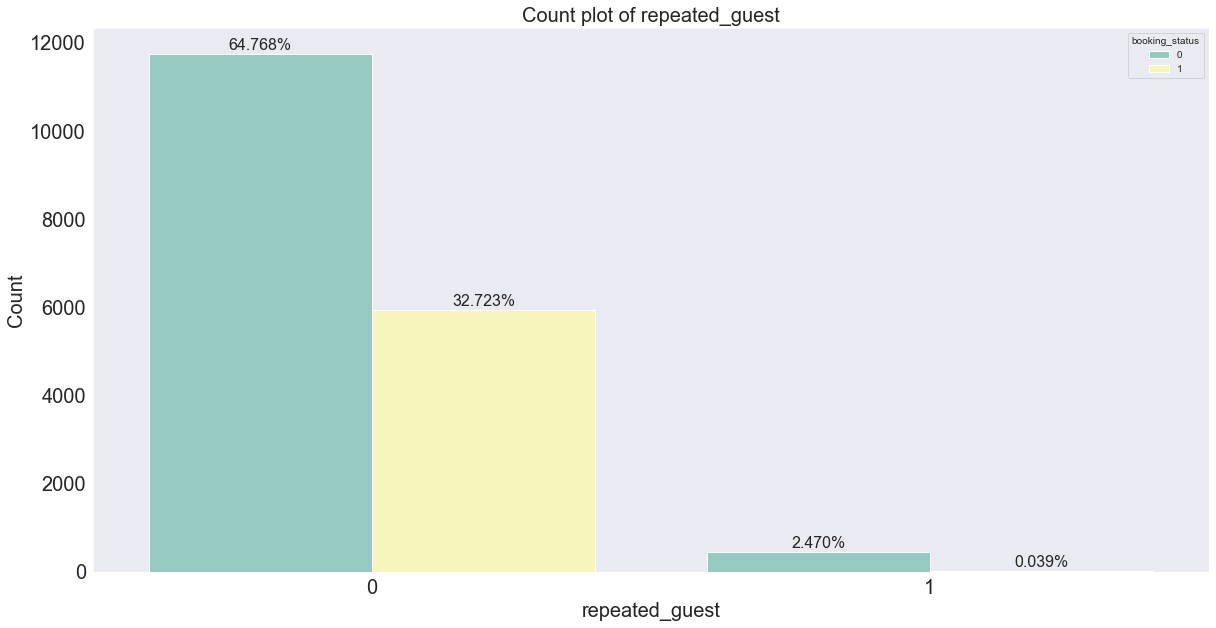

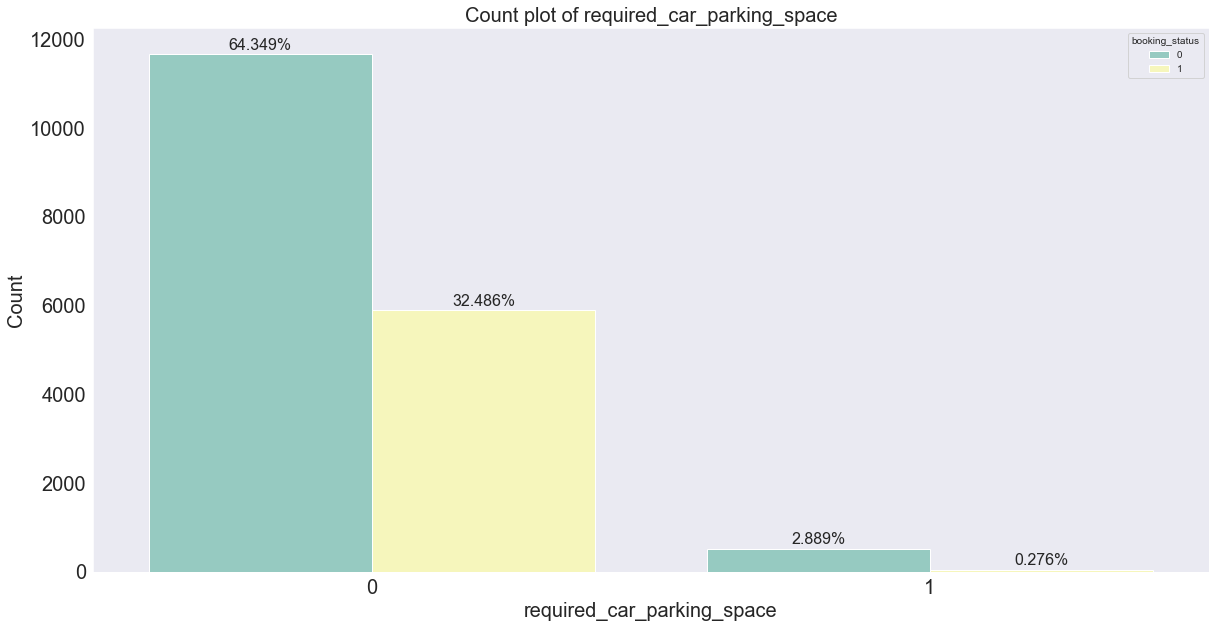

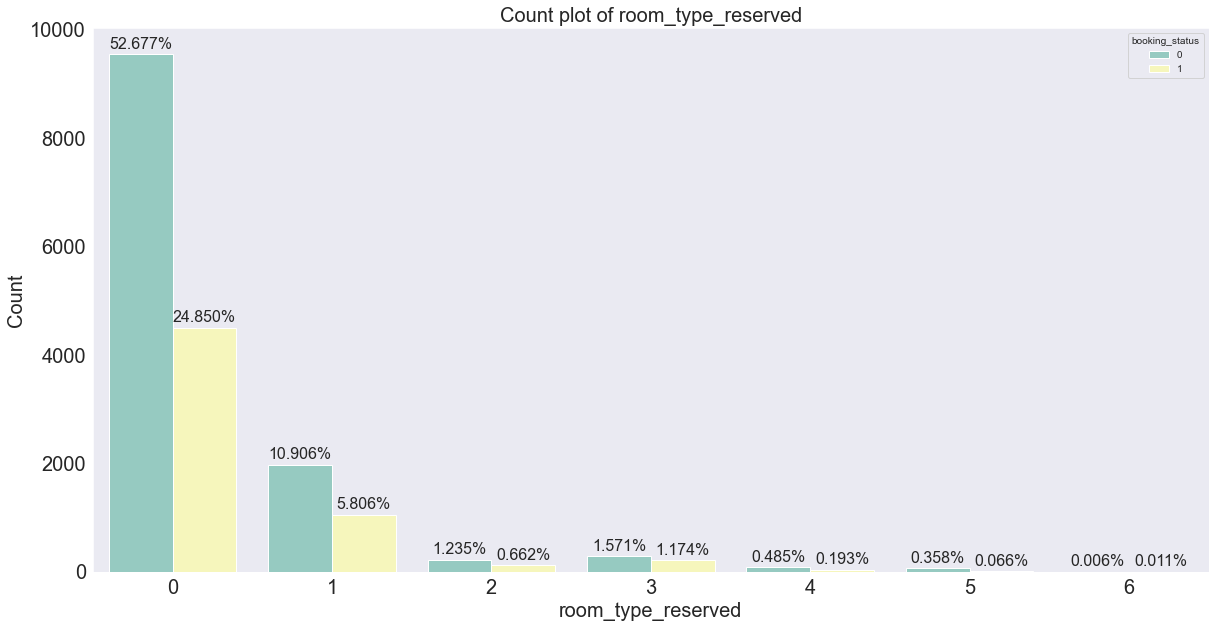

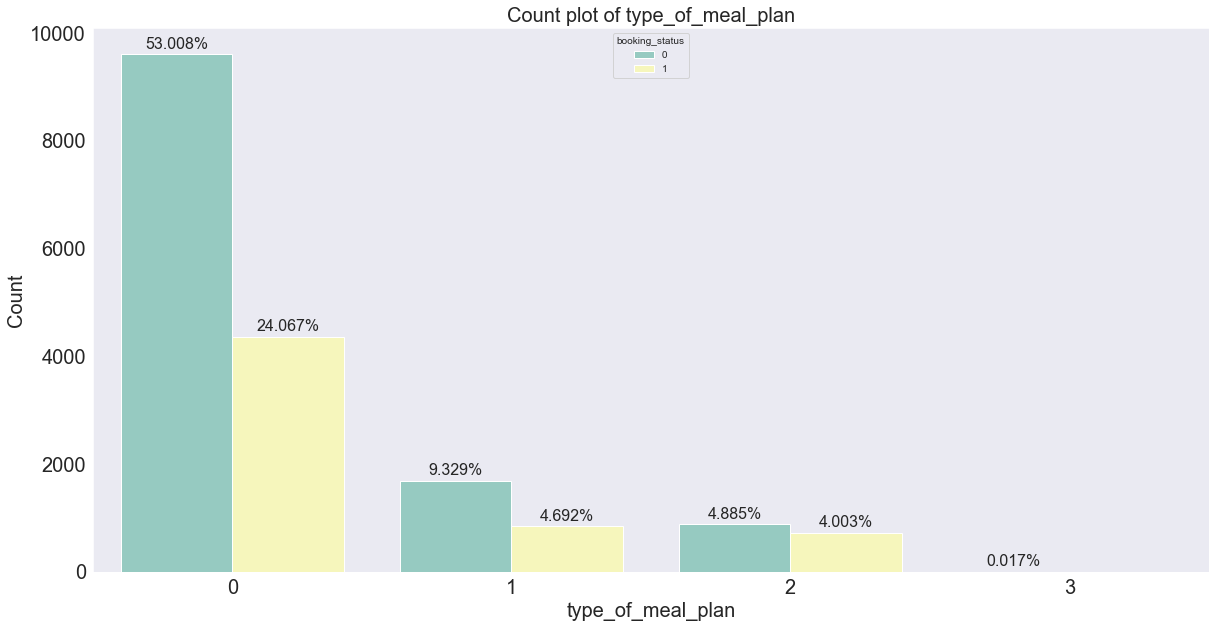

In [20]:

for i in categoricalV:
    plt.figure(figsize=(20,10))
    sns.set_style("dark")
    plot=sns.countplot(x=i,data =traindataset,palette='Set3',hue='booking_status')
    for bar in plot.patches:
      
        percentage = '{:.3f}%'.format(100 * bar.get_height()/len(traindataset))
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height()+100
        plot.annotate(percentage, (x, y),ha='center',size=16)
    plt.xticks(size=20)
    plt.xlabel(i,size=20)
    plt.yticks(size=20)
    plt.ylabel('Count',size=20)
    plt.title('Count plot of ' + i,size=20)
    plt.show()
    

In [25]:
traindataset['booking_status'].unique()#we have 0 for Not Canceled 1 for Canceled values

array([0, 1], dtype=int64)

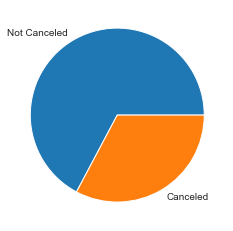

In [26]:
x = traindataset['booking_status'].value_counts()
plt.pie(x,labels=['Not Canceled', 'Canceled']);

In [27]:
traindataset['booking_status'].value_counts(normalize=True)#convert on normalization or %

0    0.672382
1    0.327618
Name: booking_status, dtype: float64

Above it shows that  in train set  we have 67.23% Not Canceled and   32.7618% Canceled

Text(0, 0.5, 'Percentage of Bookings')

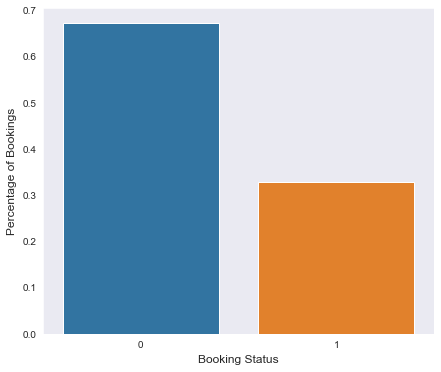

In [28]:

plt.figure(figsize=(7,6))
sns.barplot(x=traindataset['booking_status'].unique(),y=traindataset['booking_status'].value_counts(normalize=True))
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)


C:\Users\ASU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


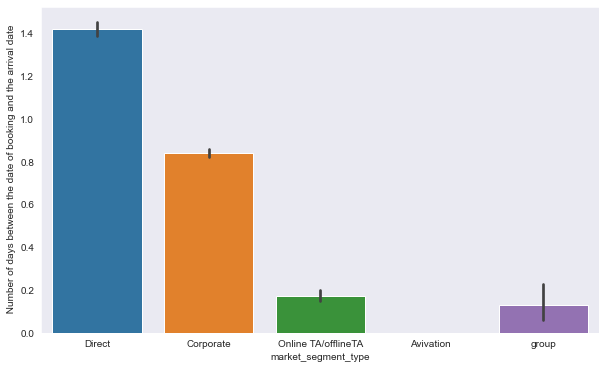

In [29]:
#there are lot of outlier(is abnormally large or small values that can cause noise in data fall above 300


labels = ['Direct', 'Corporate', 'Online TA/offlineTA', 'Avivation ','group']
ax=plt.subplots(figsize=(10,6))
sns.barplot(traindataset['market_segment_type'],traindataset['Lead_Time_Category'])
#ax.scatter(traindataset['market_segment_type'],traindataset['lead_time'])
plt.xlabel('market_segment_type')
plt.ylabel(' Number of days between the date of booking and the arrival date')
plt.xticks([0,1,2,3,4],labels)

plt.show()

In [30]:
#here we see that Avivation have min no of waiting days resone bcoze  Avivation(piolets,airhostig need immeededt booking )


<AxesSubplot:xlabel='repeated_guest,booking_status'>

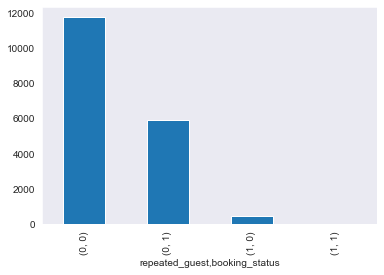

In [31]:
grp=traindataset.groupby(['repeated_guest','booking_status']).size()
grp.plot(kind='bar')



In [36]:
#label
canc_Y=traindataset['booking_status']

In [37]:
#feature
canc_X=traindataset.drop('booking_status',axis=1)


Overfitting:
    is the case when your model represents the training dataset a little too accurately.
model might be overfitting the training set and hence will fail on new data.

Good accuracy in the training dataset can’t guarantee the success of your model on unseen data.

This is why it is recommended to keep training data separate from the testing data.

The basic idea is to use the testing set as unseen data.

After training your data on the training set you should test your model on the testing set.



**Train Test split**
Testing the model on the same data as it was trained on will lead to an overfit and poor performance in real-life scenarios. In order to avoid that, split your data into 2 pieces: train set and test set.
Split arrays or matrices into random train and test subsets.



The previous module introduced the idea of dividing your data set into two subsets:

training set—a subset to train a model.
test set—a subset to test the trained model.

In [38]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(canc_X,canc_Y,test_size=0.33, random_state=42)


KNeighborsClassifier

In [39]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)


In [40]:
print("Test set prediction :{}".format(predictions))

Test set prediction :[1 0 0 ... 1 0 1]


In [41]:
y_score=model.score(x_test_data,y_test_data)
print("Test set accuracy :{:.2f}".format(y_score))

Test set accuracy :0.83


WE see that our is about 83%  accurate  almost ,meaning the model predicted the class correctly for 83% of the samples in the testdata

In [43]:

logistic=LogisticRegression()
logistic.fit(x_training_data,y_training_data)

C:\Users\ASU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
#predicting the test data
y_pred= logistic.predict(x_test_data)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test_data,y_pred)

0.7945205479452054

In [46]:
##classification_report(y_test_data,y_pred)

AUC - ROC Curve
In classification, there are many different evaluation metrics. The most popular is accuracy, which measures how often the model is correct. This is a great metric because it is easy to understand and getting the most correct guesses is often desired. There are some cases where you might consider using another evaluation metric.

Another common metric is AUC, area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

In [47]:

#model and training
my_model_xgb = XGBClassifier(n_estimators=1000,seed=0,learning_rate=0.05)

#my_model.fit(X_train_full,y)
my_model_xgb.fit(x_training_data,y_training_data,early_stopping_rounds=5,
            eval_set=[(x_test_data,y_test_data)],verbose=False)

# evaluate the model
acc = accuracy_score(y_test_data, my_model_xgb.predict(x_test_data))
#roc = cohen_kappa_score(y_valid,my_model_xgb.predict(X_valid))
roc = roc_auc_score(y_test_data,my_model_xgb.predict(x_test_data))
print("Baseline XGBClassifier Model roc_auc:",roc)
print("Baseline XGBClassifier Model accuracy_score:",acc)

C:\Users\ASU\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Baseline XGBClassifier Model roc_auc: 0.8446671538565854
Baseline XGBClassifier Model accuracy_score: 0.8668559973270965


In [58]:
xgb_pred = my_model_xgb.predict_proba(test_dataset)[:,1]
xgb_pred

array([0.01595222, 0.00935909, 0.08614518, ..., 0.8940478 , 0.19187966,
       0.03411807], dtype=float32)

In [59]:
xgb_pred
y=[]
for i in xgb_pred:
    k=round(i, 0)
    y.append(int(k))
l=[]
for i in range(test_dataset.shape[0]):
    a=random.randint(1,18138)
    l.append(a)


In [60]:
dic={'no_of_adults': test_dataset['no_of_adults'],'no_of_children' :test_dataset['no_of_children'],'no_of_weekend_nights':test_dataset['no_of_weekend_nights'],'no_of_week_nights':test_dataset['no_of_week_nights'],'type_of_meal_plan':test_dataset['type_of_meal_plan'],'required_car_parking_space':test_dataset['required_car_parking_space'],'room_type_reserved':test_dataset['room_type_reserved'],'arrival_month':test_dataset['arrival_month'],'market_segment_type':test_dataset['market_segment_type'],'repeated_guest':test_dataset['repeated_guest'],'no_of_previous_cancellations':test_dataset['no_of_previous_cancellations'],'no_of_previous_bookings_not_canceled':test_dataset['no_of_previous_bookings_not_canceled'],'no_of_special_requests':test_dataset['no_of_special_requests'],'booking_status':y}


In [62]:

output = pd.DataFrame(dic)
output.to_csv('C:/Users/ASU/Desktop/IITD/DATAScience/PythonProjectDataset/submission.csv', index=False)